In [14]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from io import StringIO
import pydotplus
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image 

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# Forming the iris dataframe
x= pd.DataFrame(iris.data, columns=iris.feature_names)
print(x.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
# Define the target variable
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
# Data exploration
print("Class Names = ", iris.target_names)
x.shape
x.describe()

Class Names =  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\HP\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


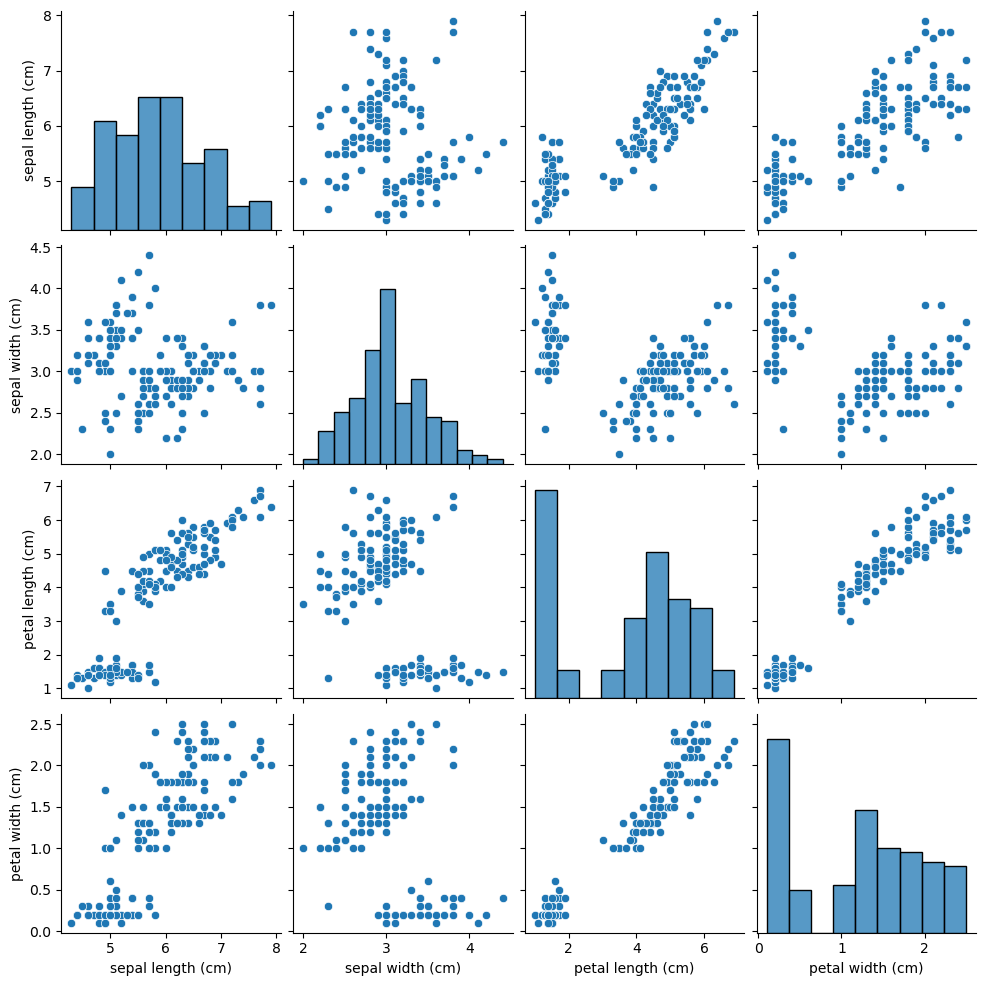

In [6]:
sns.pairplot(x)

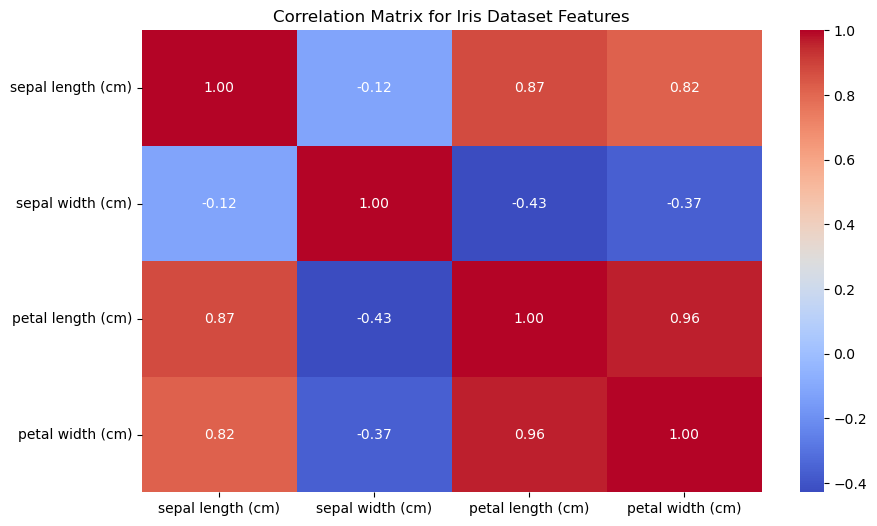

In [7]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Iris Dataset Features')
plt.show()

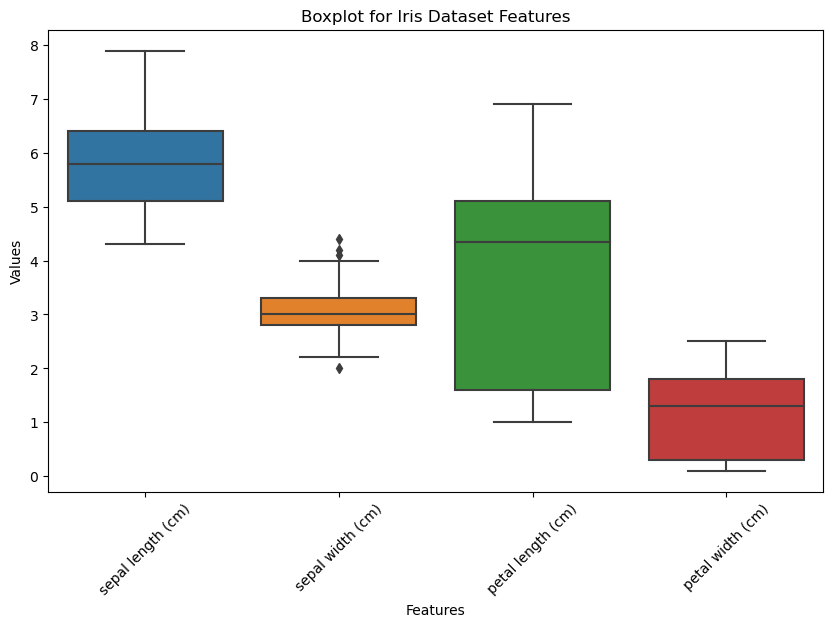

In [8]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=x)
plt.title('Boxplot for Iris Dataset Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Train a decision tree classifier
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print("Decision Tree Classifier trained successfully.")


Decision Tree Classifier trained successfully.


In [10]:
y_pred = dtree.predict(X_test)

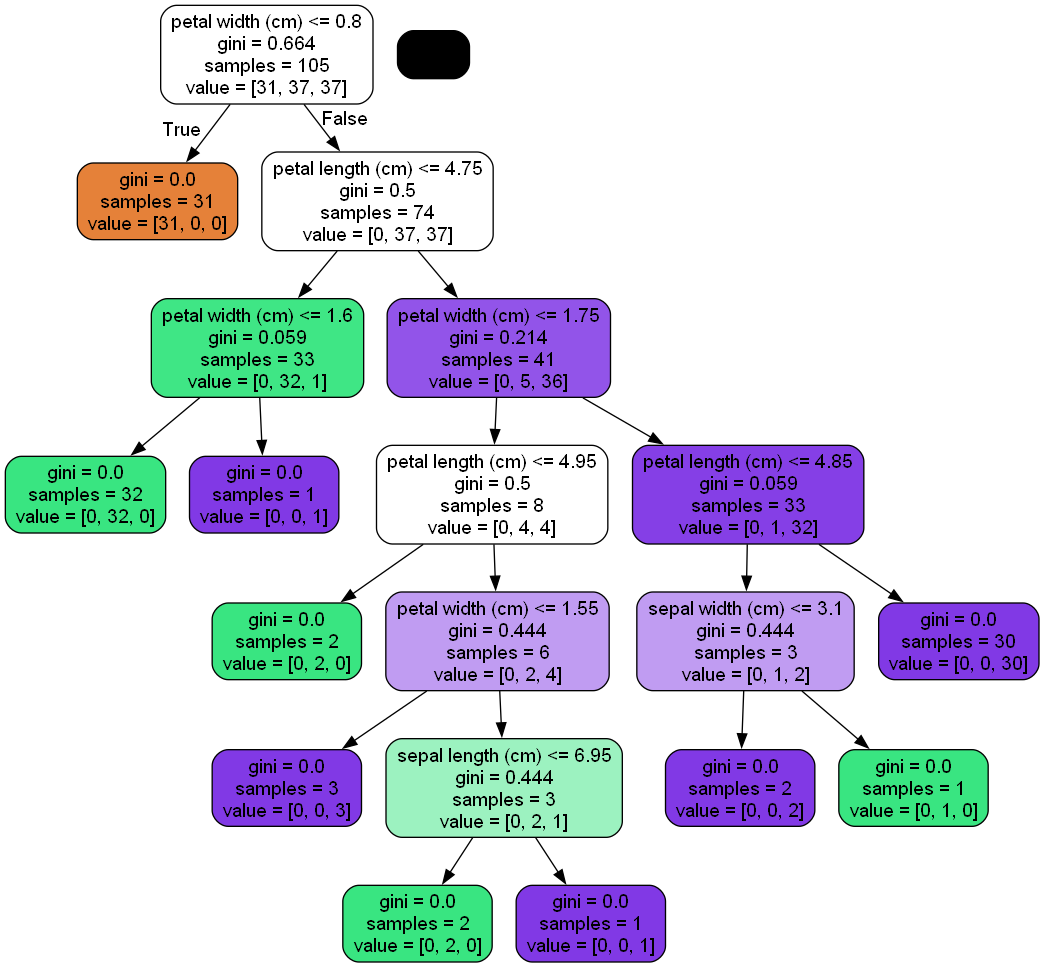

In [19]:
# Visualize the decision tree
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [22]:
# Estimating class probabilities for multiple examples
example_data = [
    [3.8, 2.7, 1.2, 0.5],
    [50.89, 5.6, 2.2, 1.5],
    [115, 7.6, 4.2, 2.5]
    
]


In [23]:
# Making predictions
for data in example_data:
    new_data_df = pd.DataFrame([data], columns=iris.feature_names)
    y_pred = dtree.predict(new_data_df)
    # Print predictions
    print(f"Predictions for example: {data}")
    print(f"The model predicts the class as {y_pred}, which is {iris.target_names[y_pred[0]]}")
    print()

Predictions for example: [3.8, 2.7, 1.2, 0.5]
The model predicts the class as [0], which is setosa

Predictions for example: [50.89, 5.6, 2.2, 1.5]
The model predicts the class as [1], which is versicolor

Predictions for example: [115, 7.6, 4.2, 2.5]
The model predicts the class as [2], which is virginica

